In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import naive_bayes

### Spam Detection using Naive Bayes on small dataset

We are given a set of email messages and we aim to classify whether a message is spam or not using the Naive Bayes classifier. The emails are represented using the **Bag of Words** model, where the presence (or absence) of certain words is encoded as binary features. In this case, we use the words `earn`, `million`, `account`, and `password` to model the emails.

**Dataset**

Let \( X_1 \) to \( X_4 \) represent the presence or absence of the words `earn`, `million`, `account`, and `password`, respectively. We are given 10 labeled examples as shown below:

| earn | million | account | password | Class     |
|------|---------|---------|----------|-----------|
| 1    | 1       | 0       | 0        | Spam      |
| 0    | 0       | 1       | 1        | Spam      |
| 0    | 1       | 1       | 0        | Not Spam  |
| 1    | 1       | 0       | 0        | Spam      |
| 0    | 0       | 0       | 0        | Not Spam  |
| 1    | 0       | 0       | 0        | Spam      |
| 1    | 0       | 0       | 0        | Not Spam  |
| 0    | 0       | 0       | 1        | Spam      |
| 1    | 0       | 1       | 1        | Spam      |
| 0    | 1       | 1       | 1        | Not Spam  |

In [2]:
data = pd.DataFrame(
        data = {
            "earn": [1,0,0,1,0,1,1,0,1,0],
            "million": [1,0,1,1,0,0,0,0,0,1],
            "account": [0,1,1,0,0,0,0,0,1,1],
            "password": [0,1,0,0,0,0,0,1,1,1],
            "y": ["spam", "spam", "not spam", "spam", "not spam", "spam", "not spam", "spam", "spam", "not spam"],
        }
    )

**Prior probabilities**

The prior probabilities of spam and not spam are:

$$
P(\text{Spam}) = \frac{6}{10} = 0.6, \quad P(\text{Not Spam}) = \frac{4}{10} = 0.4
$$

**Conditional probabilities**

For the word **earn**:

$$
P(\text{earn} = 1 \mid \text{Spam}) = \frac{4}{6}, \quad P(\text{earn} = 1 \mid \text{Not Spam}) = \frac{1}{4}
$$

For the word **million**:

$$
P(\text{million} = 1 \mid \text{Spam}) = \frac{2}{6}, \quad P(\text{million} = 1 \mid \text{Not Spam}) = \frac{2}{4}
$$

For the word **account**:

$$
P(\text{account} = 1 \mid \text{Spam}) = \frac{2}{6}, \quad P(\text{account} = 1 \mid \text{Not Spam}) = \frac{2}{4}
$$

For the word **password**:

$$
P(\text{password} = 1 \mid \text{Spam}) = \frac{3}{6}, \quad P(\text{password} = 1 \mid \text{Not Spam}) = \frac{1}{4}
$$

**Posterior Probabilities for a New Message**: `earn = 1`, `million = 1`

Using Bayes' rule:

**For Spam:**
$$
\begin{aligned}
P(Y = \text{Spam} \mid \text{earn}, \text{million}) &\propto P(Y = \text{Spam}) \cdot P(\text{earn} = 1 \mid \text{Spam}) \cdot P(\text{million} = 1 \mid \text{Spam}) \\
&\quad \cdot P(\text{account} = 0 \mid \text{Spam}) \cdot P(\text{password} = 0 \mid \text{Spam}) \\
&\propto \frac{6}{10} \cdot \frac{4}{6} \cdot \frac{2}{6} \cdot \left(1 - \frac{2}{6}\right) \cdot \left(1 - \frac{3}{6}\right) \\
&= \frac{2}{45}
\end{aligned}
$$

**For Not Spam:**
$$
\begin{aligned}
P(Y = \text{Not Spam} \mid \text{earn}, \text{million}) &\propto P(Y = \text{Not Spam}) \cdot P(\text{earn} = 1 \mid \text{Not Spam}) \cdot P(\text{million} = 1 \mid \text{Not Spam}) \\
&\quad \cdot P(\text{account} = 0 \mid \text{Not Spam}) \cdot P(\text{password} = 0 \mid \text{Not Spam}) \\
&\propto \frac{4}{10} \cdot \frac{1}{4} \cdot \frac{2}{4} \cdot \left(1 - \frac{2}{4}\right) \cdot \left(1 - \frac{1}{4}\right) \\
&= \frac{3}{160}
\end{aligned}
$$

**Normalization:**

$$
P(Y = \text{Spam} \mid \text{earn, million}) = \frac{\frac{2}{45}}{\frac{2}{45} + \frac{3}{160}} = 0.7
$$

$$
P(Y = \text{Not Spam} \mid \text{earn, million}) = \frac{\frac{3}{160}}{\frac{2}{45} + \frac{3}{160}} = 0.3
$$

**Conclusion:**

The message containing the words `earn` and `million` is classified as **Spam**.

In [3]:
x_test = pd.DataFrame(
    data={
        "message": ["earn+million", "million+account", "account+password"],
        "x": [[1, 1, 0, 0], [0, 1, 1, 0], [0, 0, 1, 1]]
    }
)

In [4]:
model = naive_bayes.CategoricalNaiveBayes()
model.fit(data.iloc[:, :-1].values, data.y.values)
x = np.array([np.array(xi) for xi in x_test.x.values])
x_test["pred"] = x_test.x.map(lambda x: model.predict_proba(np.array(x)))
print(x_test); print()

            message             x                                       pred
0      earn+million  [1, 1, 0, 0]   [0.7032967032688804, 0.2967032967311196]
1   million+account  [0, 1, 1, 0]  [0.16494845366793484, 0.8350515463320652]
2  account+password  [0, 0, 1, 1]  [0.5423728813600688, 0.45762711863993116]



### Spam Detection on SMSSpamCollection dataset


In [5]:
!source get_data.sh

File already exists


In [6]:
def tokenize(corpus):
    words_freq = {}
    tokens = []
    for sentence in corpus:
        if sentence:
            res = sentence.lower().split()
            tokens.append(res)
            for w in res:
                words_freq[w] = words_freq.get(w, 0) + 1
    return tokens, words_freq


def bag_of_words(corpus, vocab_size):
    tokenized_corpus, words_freq = tokenize(corpus=corpus)
    n_docs = len(tokenized_corpus)

    if vocab_size is None: vocab_size = len(words_freq)
    vocab = sorted(words_freq.items(), key=lambda x: x[1], reverse=True)
    vocab = [w for w,_ in vocab[:vocab_size]]

    bag = pd.DataFrame(data=0, index=range(n_docs), columns=vocab)

    for doc_id, tokens in tqdm(enumerate(tokenized_corpus), desc="bag of words"):
        for term in tokens:
            bag.loc[doc_id, term] = 1
    return bag


In [7]:
def vectorize_dataset(filename):
    messages = []
    labels = []
    with open(filename, 'r') as f:
        for line in f:
            label, text = line.split(maxsplit=1)
            messages.append(text.lower().rstrip())
            labels.append(int(label=="spam"))

    bag = bag_of_words(corpus=messages, vocab_size=None)
    # keywords = vectorizer.get_feature_names_out()
    
    return bag, np.array(labels)

In [8]:
bag, y = vectorize_dataset(filename='SMSSpamCollection')

bag of words: 5574it [00:02, 2052.86it/s]


In [ ]:
bag

,to,i,you,a,the,u,and,is,in,my,...,2.50,"name,",£750,087187272008,now1!,"pity,",so...any,suggestions?,bitching,rofl.
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,0,0,0,1,1,0,1,0,0,...,0,0,1,1,1,0,0,0,0,0
5570,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,0,0
5572,1,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
y.mean(), 1-y.mean()

(0.1340150699677072, 0.8659849300322928)

Cross Validation

In [11]:
# model = naive_bayes.GaussianNaiveBayes()
model = naive_bayes.CategoricalNaiveBayes()
scores = naive_bayes.cross_validation(model, bag.values, y, 5)
scores.mean()

0.9786355475763017

Calibration

In [28]:
X1, X2, y1, y2 = train_test_split(bag.values, y, test_size=0.5, random_state=42)

clf = naive_bayes.CategoricalNaiveBayes()
clf.fit(X1, y1)

probas = clf.predict_proba(X2)

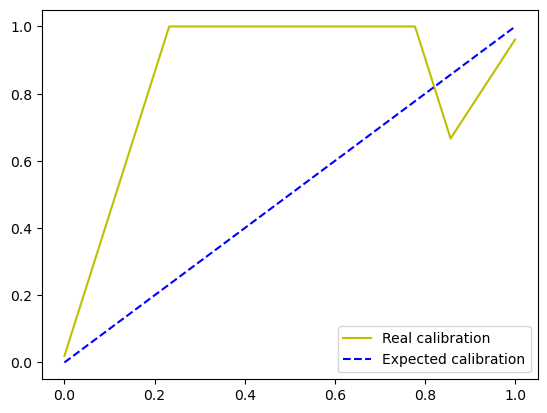

In [29]:
naive_bayes.calibration_curve_from_scratch(y_true=y2, pred_probas=probas, k=10)